# Python Project : Obesity Dataset

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 

### Questions of the survey used for initial recollection of information and the possible answers


1- What is your gender? (Gender) • Female • Male

2- What is your age? (Age)  Numeric value

3- What is your height? (Height)	Numeric value in meters

4- What is your weight? (Weight)	Numeric value in kilograms

5- Has a family member suffered or suffers from overweight? (family_history_with_overweight) • Yes • No

6- Do you eat high caloric food frequently?	(FAVC) • Yes • No

7- Do you usually eat vegetables in your meals?	(FCVC) • Never • Sometimes • Always

8- How many main meals do you have daily? (NCP) • Between 1 y 2 • Three • More than three

9- Do you eat any food between meals? (CAEC) • No • Sometimes • Frequently • Always

10- Do you smoke? (SMOKE)• Yes • No

11- How much water do you drink daily? (CH2O) • Less than a liter • Between 1 and 2 L • More than 2 L

12- Do you monitor the calories you eat daily?	(SCC) • Yes • No

13- How often do you have physical activity? (FAF)	• I do not have • 1 or 2 days • 2 or 4 days • 4 or 5 days

14-How much time do you use technological devices such as cell phone, videogames, television, computer and others?	(TUE) • 0–2 hours • 3–5 hours • More than 5 hours

15- How often do you drink alcohol?	(CALC) • I do not drink • Sometimes • Frequently • Always

16- Which transportation do you usually use? (MTRANS)	• Automobile • Motorbike • Bike • Public Transportation • Walking

In [1]:
#Imports
#maths
import math

#pandas
import pandas as pd
import numpy as np

# numpy, matplotlib, seaborn, bokeh
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas_bokeh
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
import glob 
pandas_bokeh.output_notebook()
pd.set_option('plotting.backend','pandas_bokeh')
from bokeh.models import ColumnDataSource


# machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

import pickle





Loading BokehJS ...

In [2]:
obesity_df = pd.read_csv("C:/Users/ttrar/OneDrive/Documents/Année 4/S7/Python_for_da/project/ObesityDataSet_raw_and_data_sinthetic.csv")
obesity_df.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight


In [3]:
obesity_df.rename(columns = {'FAVC':'Caloric_food',
                             'FCVC':'Veggies',
                             'NCP':'Nb_meals',
                             'CAEC':'Eat_between_meals',
                             'SMOKE':'Smoke',
                             'CH2O':'Water',
                             'SCC':'Monitor_calories',
                             'FAF':'Physical_activity',
                             'TUE':'Time_spent_on_tech',
                             'CALC':'Alcohol',
                             'MTRANS':'Transport_means',
                             'NObeyesdad':'Obesity_lvl'}, inplace = True)

In [4]:
obesity_df

,Gender,Age,Height,Weight,family_history_with_overweight,Caloric_food,Veggies,Nb_meals,Eat_between_meals,Smoke,Water,Monitor_calories,Physical_activity,Time_spent_on_tech,Alcohol,Transport_means,Obesity_lvl
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:


# We set all numerical columns as int8 columns
for col in ["Age","Veggies","Nb_meals","Water","Physical_activity","Time_spent_on_tech"]:
    obesity_df[col] = obesity_df[col].astype('int8')

#We also set object columns as categorical columns
for col in ['Gender', 'family_history_with_overweight', 'Caloric_food', 'Eat_between_meals','Smoke','Monitor_calories','Alcohol','Obesity_lvl']:
    obesity_df[col] = obesity_df[col].astype('category')
    
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   int8    
 2   Height                          2111 non-null   float64 
 3   Weight                          2111 non-null   float64 
 4   family_history_with_overweight  2111 non-null   category
 5   Caloric_food                    2111 non-null   category
 6   Veggies                         2111 non-null   int8    
 7   Nb_meals                        2111 non-null   int8    
 8   Eat_between_meals               2111 non-null   category
 9   Smoke                           2111 non-null   category
 10  Water                           2111 non-null   int8    
 11  Monitor_calories                2111 non-null   category
 12  Physical_activity   

In [6]:
obesity_df.describe()

,Age,Height,Weight,Veggies,Nb_meals,Water,Physical_activity,Time_spent_on_tech
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,23.972525,1.701677,86.586058,2.213169,2.523449,1.712459,0.734723,0.381336
std,6.308664,0.093305,26.191172,0.599397,0.830288,0.598760,0.832812,0.582536
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.000000,1.630000,65.473343,2.000000,2.000000,1.000000,0.000000,0.000000
50%,22.000000,1.700499,83.000000,2.000000,3.000000,2.000000,1.000000,0.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.000000,1.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
#Lets check how many different values have each column
obesity_df.nunique()

Gender                               2
Age                                 40
Height                            1574
Weight                            1525
family_history_with_overweight       2
Caloric_food                         2
Veggies                              3
Nb_meals                             4
Eat_between_meals                    4
Smoke                                2
Water                                3
Monitor_calories                     2
Physical_activity                    4
Time_spent_on_tech                   3
Alcohol                              4
Transport_means                      5
Obesity_lvl                          7
dtype: int64

In [8]:

obesity_df['Gender'].cat.reorder_categories(['Female','Male'],inplace=True)
obesity_df['family_history_with_overweight'].cat.reorder_categories(['no','yes'],inplace=True)
obesity_df['Caloric_food'].cat.reorder_categories(['no','yes'],inplace=True)
obesity_df['Eat_between_meals'].cat.reorder_categories(['no','Sometimes', 'Frequently','Always'],inplace=True)
obesity_df['Smoke'].cat.reorder_categories(['no','yes'],inplace=True)
obesity_df['Monitor_calories'].cat.reorder_categories(['no','yes'],inplace=True)
obesity_df['Alcohol'].cat.reorder_categories(['no','Sometimes', 'Frequently','Always'],inplace=True)
order= ['Insufficient_Weight','Normal_Weight','Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
obesity_df['Obesity_lvl'].cat.reorder_categories(order,inplace=True)

obesity_df.head(15)

,Gender,Age,Height,Weight,family_history_with_overweight,Caloric_food,Veggies,Nb_meals,Eat_between_meals,Smoke,Water,Monitor_calories,Physical_activity,Time_spent_on_tech,Alcohol,Transport_means,Obesity_lvl
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29,1.62,53.0,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,Normal_Weight
6,Female,23,1.50,55.0,yes,yes,3,3,Sometimes,no,2,no,1,0,Sometimes,Motorbike,Normal_Weight
7,Male,22,1.64,53.0,no,no,2,3,Sometimes,no,2,no,3,0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24,1.78,64.0,yes,yes,3,3,Sometimes,no,2,no,1,1,Frequently,Public_Transportation,Normal_Weight
9,Male,22,1.72,68.0,yes,yes,2,3,Sometimes,no,2,no,1,1,no,Public_Transportation,Normal_Weight


## Visualizations

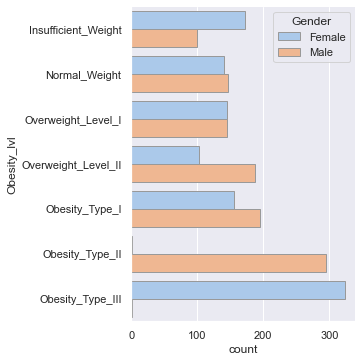

In [9]:
sns.set(rc={'figure.figsize':(8,10)})

sns.catplot(y="Obesity_lvl", hue="Gender", kind="count",
            palette="pastel", edgecolor=".6",
            data=obesity_df, legend_out=False)
            


Obesity touches both males and females. Gender does not influence very much obesity level.

<AxesSubplot:xlabel='Caloric_food', ylabel='count'>

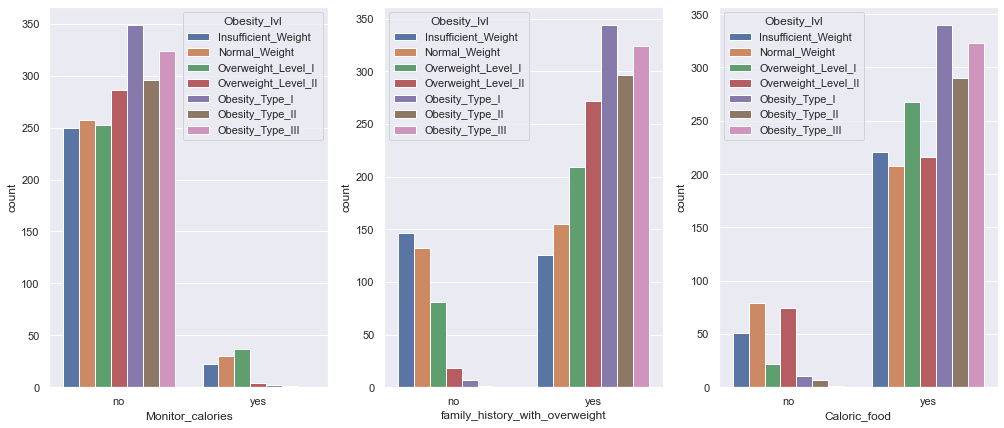

In [10]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(17,7))
# Graph 1
sns.countplot(x='Monitor_calories', hue="Obesity_lvl", data=obesity_df, ax=ax1)
# Graph 2
sns.countplot(x='family_history_with_overweight', hue="Obesity_lvl", data=obesity_df, ax=ax2)
# Graph 3
sns.countplot(x='Caloric_food', hue="Obesity_lvl", data=obesity_df, ax=ax3)


On Graph 1, the few people who monitor the calories they eat have a relatively low obesity level. 
On Graph 2, people who does not have family history with overweight have a reatively low obesity level.
On Graph 3, people who does not eat high caloric food frequently have a relatively low obesity level.
These 3 variables seem to influence obesity level.

<AxesSubplot:xlabel='Age', ylabel='Weight'>

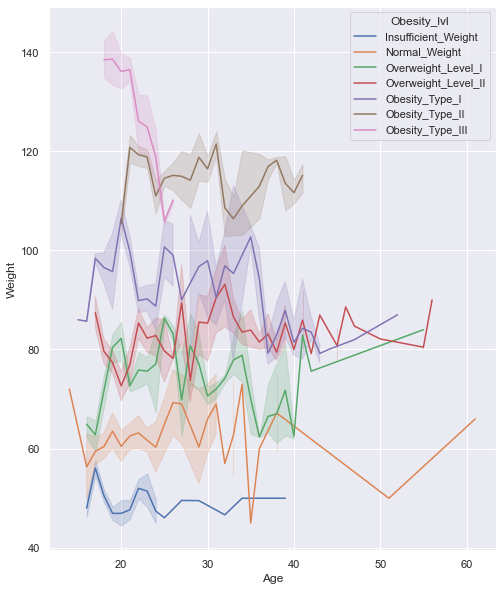

In [11]:
sns.lineplot(x='Age',y='Weight', hue="Obesity_lvl",data=obesity_df)

On notice on this graph that weight has a really high correlation with obesity level. 
Age seems to have a small influence on obesity level.

C:\Users\ttrar\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


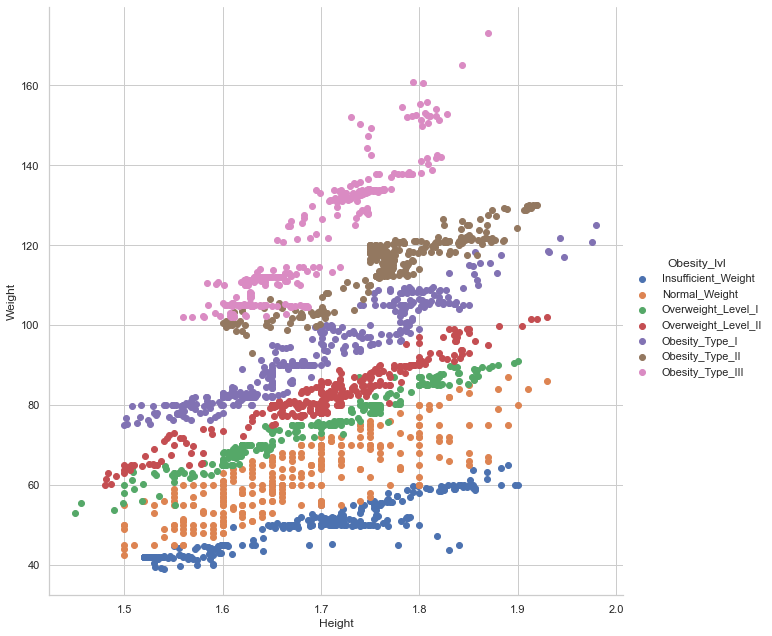

In [12]:
sns.set_style("whitegrid")
sns.FacetGrid(obesity_df, hue="Obesity_lvl", size=9) \
   .map(plt.scatter, "Height", "Weight") \
   .add_legend()
plt.show()

Again, on this graph we notice that weight has a really high correlation with obesity level. 
Height seems to have a small influence on obesity level.

In [13]:
otypes=obesity_df.Transport_means.value_counts()
otypes.plot_bokeh(kind='pie', title="Ratio of differnent transportation type used")

__x__values_original


Figure(id='1037', ...)

Here we have the ratio of different transportation type used.

<AxesSubplot:xlabel='Obesity_lvl', ylabel='Veggies'>

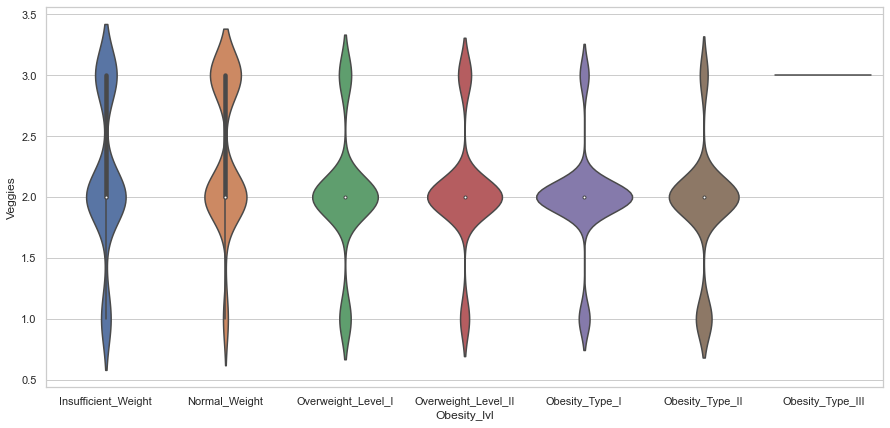

In [14]:
fig, ax = plt.subplots(figsize=(15,7))
sns.violinplot(x='Obesity_lvl',y='Veggies',data=obesity_df)


Eating vegetables very ften or not does not seem to influence obesity level. 

<AxesSubplot:xlabel='Obesity_lvl', ylabel='Weight'>

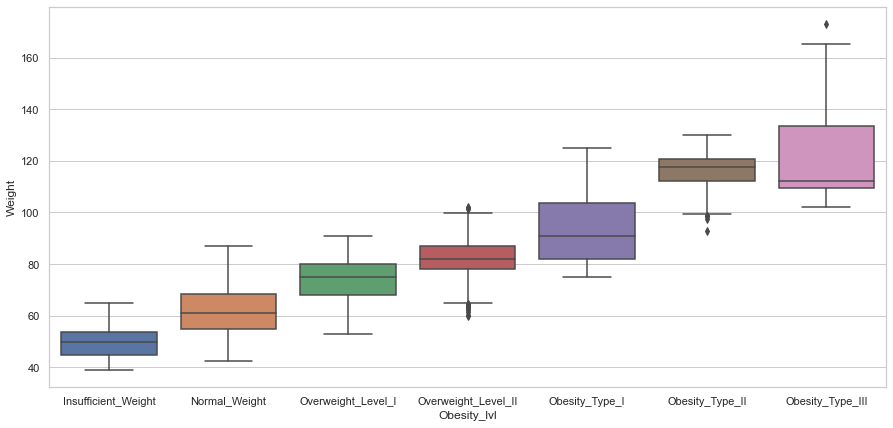

In [15]:
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x='Obesity_lvl',y='Weight',data=obesity_df)


On this box plot, it very clear that weight has a really high correlation with obesity level.

Now, to make some others relevants graphs and to make the predictions, we need to change the categorial variables that does not have numeric data. 

In [16]:

cat_columns = obesity_df.select_dtypes(['category']).columns
obesity_df[cat_columns] = obesity_df[cat_columns].apply(lambda x: x.cat.codes)

obesity_df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,Caloric_food,Veggies,Nb_meals,Eat_between_meals,Smoke,Water,Monitor_calories,Physical_activity,Time_spent_on_tech,Alcohol,Transport_means,Obesity_lvl
0,0,21,1.62,64.0,1,0,2,3,1,0,2,0,0,1,0,Public_Transportation,1
1,0,21,1.52,56.0,1,0,3,3,1,1,3,1,3,0,1,Public_Transportation,1
2,1,23,1.80,77.0,1,0,2,3,1,0,2,0,2,1,2,Public_Transportation,1
3,1,27,1.80,87.0,0,0,3,3,1,0,2,0,2,0,2,Walking,2
4,1,22,1.78,89.8,0,0,2,1,1,0,2,0,0,0,1,Public_Transportation,3


In [17]:
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int8   
 1   Age                             2111 non-null   int8   
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int8   
 5   Caloric_food                    2111 non-null   int8   
 6   Veggies                         2111 non-null   int8   
 7   Nb_meals                        2111 non-null   int8   
 8   Eat_between_meals               2111 non-null   int8   
 9   Smoke                           2111 non-null   int8   
 10  Water                           2111 non-null   int8   
 11  Monitor_calories                2111 non-null   int8   
 12  Physical_activity               21

In [18]:
obesity_df.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,Caloric_food,Veggies,Nb_meals,Eat_between_meals,Smoke,Water,Monitor_calories,Physical_activity,Time_spent_on_tech,Alcohol,Obesity_lvl
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,23.972525,1.701677,86.586058,0.817622,0.883941,2.213169,2.523449,1.140692,0.020843,1.712459,0.045476,0.734723,0.381336,0.731407,3.112269
std,0.500083,6.308664,0.093305,26.191172,0.386247,0.320371,0.599397,0.830288,0.468543,0.142893,0.598760,0.208395,0.832812,0.582536,0.515498,1.985062
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,1.630000,65.473343,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,22.000000,1.700499,83.000000,1.000000,1.000000,2.000000,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,6.000000


Let's create a new variable called Age_group.

In [19]:
age_labels = ['10-14','15-19', '20-24','25-29', '30-34','35-39', '40-44','45-49', '50-54','55-59','60-66']
obesity_df['Age_group'] = pd.cut(obesity_df.Age, range(10,66,5), right=False, labels=age_labels)
obesity_df[['Gender','Age','Age_group']].head(5)

,Gender,Age,Age_group
0,0,21,20-24
1,0,21,20-24
2,1,23,20-24
3,1,27,25-29
4,1,22,20-24


<AxesSubplot:xlabel='Age_group', ylabel='Obesity_lvl'>

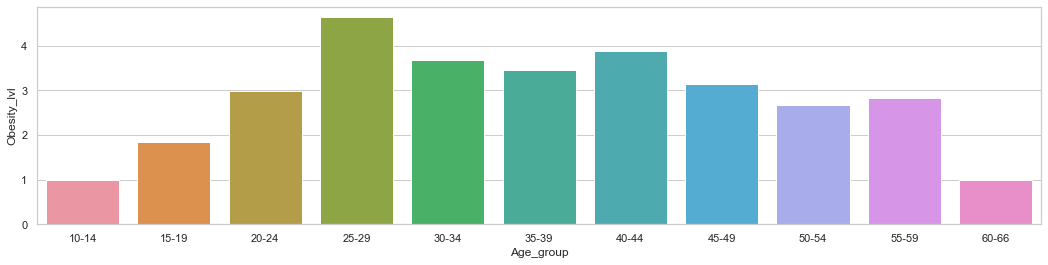

In [20]:
# Pourcentage de survivants par groupe d'age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = obesity_df[["Age_group", "Obesity_lvl"]].groupby(['Age_group'],as_index=False).mean()
#print("average_age:\n%s"%average_age)
#axis1.set_xticklabels(axis1.get_xticklabels(), rotation=90, ha="right")
sns.barplot(x='Age_group', y='Obesity_lvl', data=average_age)

On this graph, it is intersting to notice that some age groups have in means a higher obesity level than other groups.

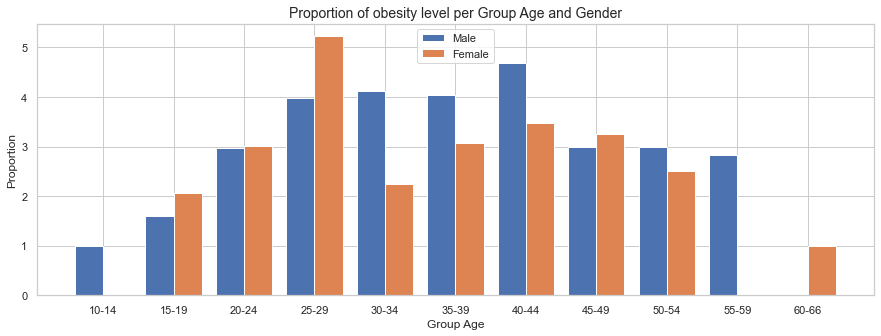

In [21]:
male_data = obesity_df[obesity_df.Gender == 1].groupby('Age_group').Obesity_lvl.mean().values
female_data = obesity_df[obesity_df.Gender == 0].groupby('Age_group').Obesity_lvl.mean().values

f, ax = plt.subplots(1, 1, figsize=(15,5))

male_plt_position = np.array(range(len(age_labels)))
female_plt_position = np.array(range(len(age_labels)))+0.4

ax.bar(male_plt_position, male_data,width=0.4,label='Male')
ax.bar(female_plt_position, female_data,width=0.4,label='Female')

tick_spacing = np.array(range(len(age_labels)))+0.2
plt.xticks(tick_spacing,  age_labels)
ax.set_ylabel("Proportion")
ax.set_xlabel("Group Age")
ax.set_title("Proportion of obesity level per Group Age and Gender",fontsize=14)
plt.legend(loc='best')
plt.show()

On this graph we have to proportion of obesity level per group age and gender. Age seems to have an influence on the obesity level.

For the Transport_means variable, let's modify the structure of data. Indeed, let's use get_dummies to create new variables.
Then we drop Transport_means variable, without loosing any information.
We can also drop Age_group variable.

In [22]:
if set(['Transport_means']).issubset(obesity_df):
    transport_dummies_obesity  = pd.get_dummies(obesity_df['Transport_means'],drop_first=True)
    obesity_df = obesity_df.join(transport_dummies_obesity)

    
obesity_df = obesity_df.drop("Transport_means", axis=1)
obesity_df =obesity_df.drop("Age_group", axis=1)
obesity_df

,Gender,Age,Height,Weight,family_history_with_overweight,Caloric_food,Veggies,Nb_meals,Eat_between_meals,Smoke,Water,Monitor_calories,Physical_activity,Time_spent_on_tech,Alcohol,Obesity_lvl,Bike,Motorbike,Public_Transportation,Walking
0,0,21,1.620000,64.000000,1,0,2,3,1,0,2,0,0,1,0,1,0,0,1,0
1,0,21,1.520000,56.000000,1,0,3,3,1,1,3,1,3,0,1,1,0,0,1,0
2,1,23,1.800000,77.000000,1,0,2,3,1,0,2,0,2,1,2,1,0,0,1,0
3,1,27,1.800000,87.000000,0,0,3,3,1,0,2,0,2,0,2,2,0,0,0,1
4,1,22,1.780000,89.800000,0,0,2,1,1,0,2,0,0,0,1,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1.710730,131.408528,1,1,3,3,1,0,1,0,1,0,1,6,0,0,1,0
2107,0,21,1.748584,133.742943,1,1,3,3,1,0,2,0,1,0,1,6,0,0,1,0
2108,0,22,1.752206,133.689352,1,1,3,3,1,0,2,0,1,0,1,6,0,0,1,0
2109,0,24,1.739450,133.346641,1,1,3,3,1,0,2,0,1,0,1,6,0,0,1,0


In [23]:
matcor=obesity_df.corr(method='pearson')
matcor.style.background_gradient(cmap='coolwarm')

,Gender,Age,Height,Weight,family_history_with_overweight,Caloric_food,Veggies,Nb_meals,Eat_between_meals,Smoke,Water,Monitor_calories,Physical_activity,Time_spent_on_tech,Alcohol,Obesity_lvl,Bike,Motorbike,Public_Transportation,Walking
Gender,1.000000,0.050677,0.618466,0.161668,0.102512,0.064934,-0.317272,0.023921,-0.091543,0.044698,0.194832,-0.102633,0.174468,0.071148,-0.007616,-0.031464,0.057001,0.045203,-0.160184,0.039317
Age,0.050677,1.000000,-0.030738,0.190263,0.195552,0.055872,-0.013240,-0.070632,-0.074851,0.097897,-0.090672,-0.111882,-0.163307,-0.234951,0.043344,0.269966,0.006784,0.024308,-0.558167,-0.054899
Height,0.618466,-0.030738,1.000000,0.463136,0.247684,0.178364,-0.070032,0.214633,-0.048818,0.055499,0.191061,-0.133753,0.234248,-0.006181,0.129732,0.133565,0.028996,-0.010471,-0.089684,0.036951
Weight,0.161668,0.190263,0.463136,1.000000,0.496820,0.272300,0.201087,0.126058,-0.287493,0.025746,0.052705,-0.201906,-0.158726,-0.274960,0.206677,0.913251,-0.021745,-0.037300,0.059332,-0.100805
family_history_with_overweight,0.102512,0.195552,0.247684,0.496820,1.000000,0.208036,0.008332,0.052504,-0.169787,0.017385,0.053889,-0.185422,-0.128375,-0.097283,-0.036676,0.505148,-0.015435,-0.051011,-0.058927,-0.067076
Caloric_food,0.064934,0.055872,0.178364,0.272300,0.208036,1.000000,-0.073482,-0.019162,-0.150068,-0.050660,-0.082638,-0.190658,-0.156302,-0.054783,0.089520,0.247793,-0.082005,-0.035401,0.028539,-0.179473
Veggies,-0.317272,-0.013240,-0.070032,0.201087,0.008332,-0.073482,1.000000,0.138510,0.100727,0.025567,0.037495,0.070328,0.019344,-0.150120,0.085690,0.212095,-0.006768,0.018173,0.065938,0.069175
Nb_meals,0.023921,-0.070632,0.214633,0.126058,0.052504,-0.019162,0.138510,1.000000,0.122478,0.035825,0.067431,-0.006166,0.126888,0.028048,0.116039,0.050017,0.033114,0.017771,-0.034260,0.037951
Eat_between_meals,-0.091543,-0.074851,-0.048818,-0.287493,-0.169787,-0.150068,0.100727,0.122478,1.000000,0.055282,-0.048315,0.109179,0.098121,0.157565,-0.047540,-0.329350,0.017857,0.076583,-0.003013,0.082571
Smoke,0.044698,0.097897,0.055499,0.025746,0.017385,-0.050660,0.025567,0.035825,0.055282,1.000000,0.014689,0.047731,0.022590,0.063889,0.082471,0.003442,-0.008416,0.035496,-0.022409,0.017184


On this correaltion array, we can see the correlation between all variables between themselves. It is interesting to have a look at the Obesity_lvl raw. The variables that influence obesity level the most are Weight and family_history_with_overweight.

# Machine learning and predictions

Let's split data into training set and test set. 66% of data will be used to train the model and 33% to test the model.

In [24]:
X = obesity_df.drop("Obesity_lvl",axis=1)
Y = obesity_df["Obesity_lvl"]

X_train, X_test , Y_train , Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

We build an dataframe to store the score of the different models.

In [25]:

scores_models = pd.DataFrame(columns=['model_name', 'score'])

In [26]:
scaler=StandardScaler()
scaler.fit(X_train) #only fitting training set

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

### Creating models

We will use the following algorithms from sckit-learn library :
- Logistic Regression
- Support Vector Machines
- Random Forest
- KNeighborsClassifier
- Gaussian Naive Bayes

For each model, we firstly use a grid seach to find the best hyperparameters.
Then, we run each model with the best hyperparameters found.
Finally, we add to score_models the score of each model.

In [27]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

C:\Users\ttrar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttrar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ttrar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ttrar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ttrar\anaconda3\lib\site-packages\sklearn\model_selection\_v

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.949785236240136


C:\Users\ttrar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
#Learning
logreg = LogisticRegression(C= 1000.0, penalty= 'l2')
model = logreg.fit(X_train, Y_train)
#prediction
predictions = model.predict(X_test)
#scoring
score = model.score(X_test,Y_test)

scoreDF = pd.DataFrame({'model_name': ['Logistic Regression'],'score': [score]})
scores_models=scores_models.append(scoreDF,ignore_index=True)
scores_models

C:\Users\ttrar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,model_name,score
0,Logistic Regression,0.952654


In [29]:

tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]
clf = GridSearchCV(SVC(), tuned_parameters)
clf.fit(X_train, Y_train)

print("Best parameters set found on development set:")

print(clf.best_params_)


Best parameters set found on development set:
{'C': 100, 'kernel': 'linear'}


In [30]:
#Learning
svc = SVC(C= 100, kernel= 'linear')
model = svc.fit(X_train, Y_train)
#prediction
predictions = model.predict(X_test)
#scoring
score = model.score(X_test,Y_test)

scoreDF = pd.DataFrame({'model_name': ['SVC'],'score': [score]})
scores_models=scores_models.append(scoreDF,ignore_index=True)
scores_models

,model_name,score
0,Logistic Regression,0.952654
1,SVC,0.959828


In [31]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv= 5)
CV.fit(X_train, Y_train)
CV.best_params_

KeyboardInterrupt: 

In [35]:
#Learning
random_forest = RandomForestClassifier(criterion='entropy', bootstrap=False, max_features= 'auto', n_estimators= 500) #changing hyperparamters
model = random_forest.fit(X_train, Y_train)
#prediction
predictions = model.predict(X_test)
#scoring
score = model.score(X_test,Y_test)

scoreDF = pd.DataFrame({'model_name': ['Random_Forest'],'score': [score]})
scores_models=scores_models.append(scoreDF,ignore_index=True)
scores_models

,model_name,score
0,Logistic Regression,0.952654
1,SVC,0.959828
2,Random_Forest,0.954089


In [36]:
grid_params = {'n_neighbors':[3,5,11,19], 'weights': ['uniform','distance'],'metric':['euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv=3, n_jobs=-1)
gs_results = gs.fit(X_train, Y_train)
gs_results.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 

In [37]:
#Learning
knn = KNeighborsClassifier(metric=  'manhattan', n_neighbors = 3, weights = 'distance')
model = knn.fit(X_train, Y_train)
#prediction
predictions = model.predict(X_test)
#scoring²&a
score = model.score(X_test,Y_test)

scoreDF = pd.DataFrame({'model_name': ['KNN'],'score': [score]})
scores_models=scores_models.append(scoreDF,ignore_index=True)
scores_models

,model_name,score
0,Logistic Regression,0.952654
1,SVC,0.959828
2,Random_Forest,0.954089
3,KNN,0.847920


In [38]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=GaussianNB(), 
                 param_grid=params_NB, 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, Y_train)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.2s finished


{'var_smoothing': 0.012328467394420659}

In [39]:
#Learning
gaussian = GaussianNB(var_smoothing= 0.012328467394420659)
model = gaussian.fit(X_train, Y_train)
#prediction
predictions = model.predict(X_test)
#scoring
score = model.score(X_test,Y_test)

scoreDF = pd.DataFrame({'model_name': ['Gauss'],'score': [score]})
scores_models=scores_models.append(scoreDF,ignore_index=True)
scores_models

,model_name,score
0,Logistic Regression,0.952654
1,SVC,0.959828
2,Random_Forest,0.954089
3,KNN,0.847920
4,Gauss,0.576758


[Text(0.5, 0, 'Model'), Text(0, 0.5, '%')]

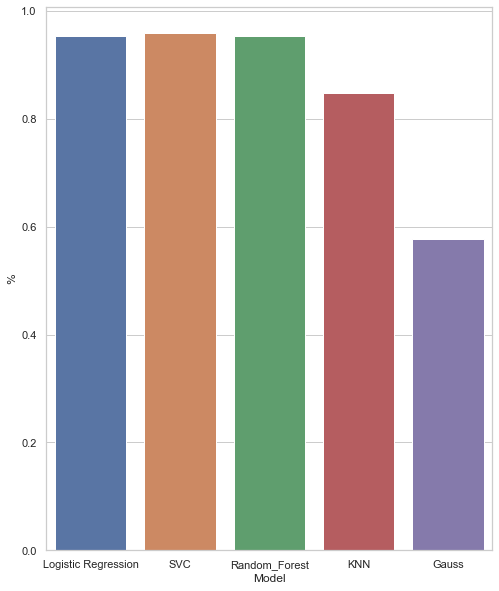

In [40]:
ax = sns.barplot(x='model_name',y='score',data=scores_models)
ax.set(xlabel='Model', ylabel='%')


For Api

In [32]:
svc = SVC(C= 100, kernel= 'linear')
model = svc.fit(X_train, Y_train)


In [33]:
pickle.dump(model, open('model.sav', 'wb'))
